In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import wrangle
import os

from wrangle import get_zillow_data
from wrangle import new_zillow_data

In [7]:
# This reads zillow data into a dataframe
df = get_zillow_data()
# this gives an overview of some values to see what we have imported
df.head()

,id,propertylandusetypeid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,1,261.0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,15,261.0,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,16,261.0,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,17,261.0,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,20,261.0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


Tax value dollar count looks like the target variable

In [8]:
# this gives overall idea of rows and columns
df.shape

(2152863, 9)

In [10]:
# this gives descriptive statistics for each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2152863.0,1.490834e+06,860878.470977,1.00,745117.00,1490613.00,2235859.50,2982282.00
propertylandusetypeid,2152863.0,2.610000e+02,0.000000,261.00,261.00,261.00,261.00,261.00
bedroomcnt,2152852.0,3.287196e+00,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688e+00,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1.862855e+03,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,4.618962e+05,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1.960950e+03,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5.634866e+03,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6.048377e+03,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [12]:
# this shows data type and gives an optional boolean parameter showing how may rows in each column have non-null values
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            2152863 non-null  int64  
 1   propertylandusetypeid         2152863 non-null  float64
 2   bedroomcnt                    2152852 non-null  float64
 3   bathroomcnt                   2152852 non-null  float64
 4   calculatedfinishedsquarefeet  2144379 non-null  float64
 5   taxvaluedollarcnt             2152370 non-null  float64
 6   yearbuilt                     2143526 non-null  float64
 7   taxamount                     2148421 non-null  float64
 8   fips                          2152863 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 164.3 MB


id, propertylandusetypeid, and fips are the only columns that do not have null values. sqfeet, yearbuilt, and taxamount have a relatively large number of null values (in the thousands)

In [13]:
# this counts null values in each column
df.isnull().sum()

id                                 0
propertylandusetypeid              0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [14]:
# this returns a boolean that checks for any null values in a column
df.isnull().any()

id                              False
propertylandusetypeid           False
bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [15]:
# this gives the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]


Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

In [17]:
# There are millions of values in the df total, so we will drop all null row values for purposes of MVP 
# and then check to make sure all null values have been dropped
df = df.dropna()
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            2140235 non-null  int64  
 1   propertylandusetypeid         2140235 non-null  float64
 2   bedroomcnt                    2140235 non-null  float64
 3   bathroomcnt                   2140235 non-null  float64
 4   calculatedfinishedsquarefeet  2140235 non-null  float64
 5   taxvaluedollarcnt             2140235 non-null  float64
 6   yearbuilt                     2140235 non-null  float64
 7   taxamount                     2140235 non-null  float64
 8   fips                          2140235 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 163.3 MB


No data types need to be converted and there don't seem to be any odd values that are obvious. We've opted not to drop duplicates for MVP.

In [18]:
#let's drop the propertylandusetypeid as it is the same for all observations
df = df.drop(columns=['propertylandusetypeid'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id                            int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), int64(1)
memory usage: 147.0 MB


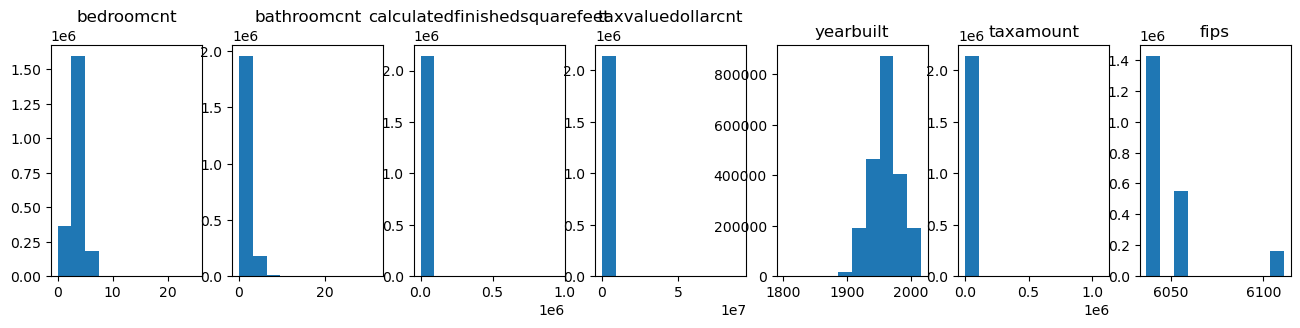

In [21]:
# let's create a loop to quickly visualize the distributions of data in each column
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=10)

    # Hide gridlines.
    plt.grid(False)

In [ ]:
def wrangle_zillow():
    '''
    Read zillow data into a pandas DataFrame from mySQL,
    drop property use id column, drop rows with null values,
    return cleaned zillow DataFrame.
    '''

    # Acquire data

    df = get_zillow_data()
    
    # drop property use id column
    
    df = df.drop(columns=['propertylandusetypeid'])

    # Drop all rows with NaN values.
    
    df = df.dropna()

    return df